<a href="https://colab.research.google.com/github/WardahAsad/ML_Projects_on_Colab/blob/main/Text_Classification_with_RNN_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment: Text Classification with RNN

#### Objective:

The goal of this assignment is to help you build and train a Recurrent Neural Network (RNN) for text classification using Keras/TensorFlow. You will preprocess text data, create sequences, and implement an RNN to classify the data into different categories.

#### Tasks:

1. **Text Preprocessing:**

   * Given the list of documents (`docs`), use a tokenizer to convert the text into sequences of word indices.
   * Preprocess the text by removing punctuation and converting all text to lowercase.
   * Apply padding to ensure that all sequences are of equal length.

2. **Building the RNN Model:**

   * Construct an RNN model using Keras.

     * Use an Embedding layer to convert word indices into dense vectors of fixed size.
     * Add one or more RNN layers (such as LSTM or GRU).
     * Include a Dense layer for classification at the output.

3. **Model Compilation and Training:**

   * Compile the model with an appropriate optimizer, loss function (e.g., categorical cross-entropy), and evaluation metric.
   * Train the model on the sequence data, and monitor the training and validation accuracy.

4. **Evaluation:**

   * Evaluate the model's performance on a test set (you may generate a synthetic test set or use a portion of the existing data for testing).
   * Plot the loss and accuracy curves for the training and validation sets.


5. **Conclusion:**

   * Summarize the model’s performance and the key insights gained from training the RNN on the text data.
   * Suggest any improvements to the model or preprocessing steps.

#### Submission:

* Submit the Jupyter notebook with all code and detailed explanations for each step.
* Include visualizations of the model's training progress (e.g., loss and accuracy curves).

#### Grading Criteria:

* Correct implementation of text preprocessing steps.
* Proper construction and training of the RNN model.
* Evaluation of model performance on a test dataset.
* Clear and insightful interpretation of the results.
* Quality of code documentation and explanations.

---


In [1]:
# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import string

# ==============================================
# STEP 1: Handle Documents (because not provided)
# ==============================================

print("1. Creating dataset (since documents not provided)...")

# I am Using Wikipedia text
text = """
Artificial intelligence is intelligence demonstrated by machines.
Machine learning is a subset of AI that focuses on algorithms.
Deep learning uses neural networks with many layers.
Natural language processing enables computers to understand text.
Computer vision allows machines to interpret visual information.
Robotics combines AI with mechanical engineering.
Autonomous vehicles use AI for navigation and decision making.
AI ethics concerns the moral implications of artificial intelligence.
The Turing Test evaluates a machine's ability to exhibit intelligence.
Neural networks are inspired by biological neurons in the brain.
""".strip()

1. Creating dataset (since documents not provided)...


In [2]:
# Split into "documents" (paragraphs)
docs = [line for line in text.split('\n') if line.strip()]

# Create fake categories (since we don't have real labels)
categories = ['AI Theory', 'ML Techniques', 'Applications', 'Ethics']
num_classes = len(categories)

# Assign random categories to documents (for demonstration)
y = np.random.randint(0, num_classes, size=len(docs))
y = tf.keras.utils.to_categorical(y, num_classes=num_classes)

print(f"\nCreated {len(docs)} documents with {num_classes} categories")
print("Sample document:", docs[0])
print("Sample label:", y[0])


Created 10 documents with 4 categories
Sample document: Artificial intelligence is intelligence demonstrated by machines. 
Sample label: [0. 1. 0. 0.]


# ==============================================
# STEP 2: Text Preprocessing

In [3]:
print("\n2. Preprocessing text...")

# Clean text
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

cleaned_docs = [clean_text(doc) for doc in docs]

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_docs)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

print(f"Vocabulary size: {vocab_size}")

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(cleaned_docs)
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

print("\nSample sequence:", sequences[0])
print("Padded sequence:", padded_sequences[0])


2. Preprocessing text...
Vocabulary size: 66

Sample sequence: [6, 1, 7, 1, 15, 8, 3]
Padded sequence: [ 6  1  7  1 15  8  3  0  0  0  0]


# ==============================================
# STEP 3: Build RNN Model

In [5]:
print("\n3. Building RNN model...")

embedding_dim = 16

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


3. Building RNN model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# ==============================================
# STEP 4: Train the Model

In [6]:
print("\n4. Training model...")

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, y, test_size=0.2, random_state=42
)

history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_test, y_test),
    batch_size=8
)



4. Training model...
Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1250 - loss: 1.3864 - val_accuracy: 0.0000e+00 - val_loss: 1.3854
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.5000 - loss: 1.3829 - val_accuracy: 0.0000e+00 - val_loss: 1.3839
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.3750 - loss: 1.3793 - val_accuracy: 0.0000e+00 - val_loss: 1.3825
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.3750 - loss: 1.3756 - val_accuracy: 0.0000e+00 - val_loss: 1.3810
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.3750 - loss: 1.3718 - val_accuracy: 0.0000e+00 - val_loss: 1.3795
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.3750 - loss: 1.3676 - val_accuracy: 0.0000e+00 - val_loss: 1.3780
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.3750 - loss: 1.3630 - val_accuracy: 0.0000e+00 - val_loss: 1.3764
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.3750 - 

#==============================================
# STEP 5: Evaluation


5. Evaluating model...


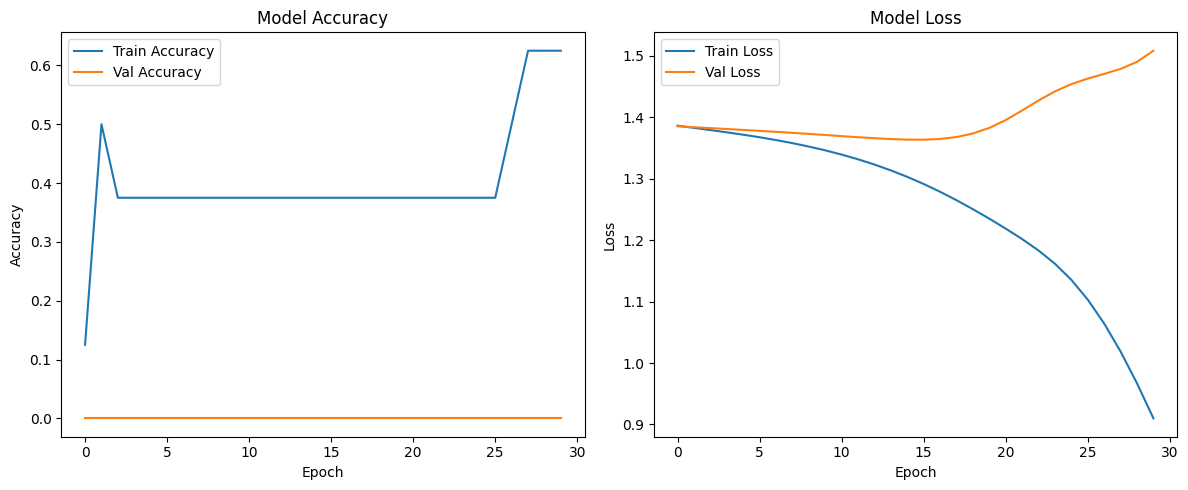

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0000e+00 - loss: 1.5085

Test Accuracy: 0.00


In [7]:
print("\n5. Evaluating model...")

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Test evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.2f}")


# ==============================================
# STEP 6: Make Predictions

In [8]:
print("\n6. Making predictions...")

sample_texts = [
    "neural networks and deep learning",
    "AI moral implications",
    "computer vision systems"
]

# Preprocess samples
cleaned_samples = [clean_text(text) for text in sample_texts]
sample_sequences = tokenizer.texts_to_sequences(cleaned_samples)
sample_padded = pad_sequences(sample_sequences, maxlen=max_length, padding='post')

# Predict
predictions = model.predict(sample_padded)
predicted_classes = np.argmax(predictions, axis=1)

print("\nSample Predictions:")
for text, pred in zip(sample_texts, predicted_classes):
    print(f"Text: '{text}' => Predicted: {categories[pred]}")


6. Making predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step

Sample Predictions:
Text: 'neural networks and deep learning' => Predicted: ML Techniques
Text: 'AI moral implications' => Predicted: Applications
Text: 'computer vision systems' => Predicted: Applications
